# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A91063209 (Zongchen) 
- A92060274 (Karen)
- A14443387 (Brandon) 
- U07313790 (Nareg)
- A12933386 (Justin)
- A13779898 (Sida Qin)


Start your project here.

## Introduction and Background


## Data Description

### The following sites will be scrapped for the aritist names
- Control dataset - notable/popular musicians who are alive and happy
    Billboard Hot 100 Artists
    https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_chart_achievements_by_decade 
- Dependent dataset - notable/popular musicians who have passed as a result of self-inflicted harm, mental health deterioration, and other issues 
    List of deaths of pop musicians by drug overdose
    https://en.wikipedia.org/wiki/List_of_pop_musicians_who_died_of_drug_overdose
- Musicians that have battled drug addiction
    https://drugabuse.com/30-famous-musicians-who-have-battled-drug-addiction-and-alcoholism/ 
    
There are about 150 artists in the dependent dataset and 50 artist in the control. Since our focus is the words of the artists, we can keep the number of artists small.

### Lyrics data set
- Data set of many songs and their lyrics. This data set has been downloaded locally with the notebook, since it is in a nice csv file, we will simply call pandas.read_csv( ) to convert it into a dataframe. To see its contact, refer to the data gathering section. It has three columns: Band (which is the artist name), Lyrics (lyrics of the song), and Song(Song name). There are about 500,000 rows.
    https://www.kaggle.com/artimous/every-song-you-have-heard-almost#Lyrics1.csv

## Data Cleaning and Preprocessing

We will scraped the several sites to get the artist names we are interested in. Then, we will find thoes artists inside the lyrics data set, extract all their songs. We will combine the song lyrics for each artist into one data frame that we can work with.

### Libraries used :

In [254]:
import requests
import urllib.request
import pandas as pd
from pandas.io.html import read_html
import bs4
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

import re
import lxml

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jjk10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jjk10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jjk10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### I. Gathering data using BeautifulSoup pt. I - dependent set/troubled artists

Using a set "names", we keep appending unique names we find in the websites

The first website, it is a wikipedia page,and the data are in tables. The for-loop loops through each row and fetch the artist name.

In [255]:
wiki = "https://en.wikipedia.org/wiki/List_of_pop_musicians_who_died_of_drug_overdose"
page = requests.get(wiki)
soup = BeautifulSoup(page.content,'html.parser')
names = set()
tables = soup.findAll(name='table', class_='wikitable sortable')


for table in tables:
    body = table.findChild("tbody" , recursive=False)
    for row in body.findAll('tr'):
        cells = row.findAll('a')
        if(len(cells) == 0) :continue
        names.add(cells[0].text.strip())

The second website, all the artist names are in h2 tags, so we loop through all h2 tags and extrach artist names

In [256]:
page = requests.get("https://drugabuse.com/30-famous-musicians-who-have-battled-drug-addiction-and-alcoholism/")
soup = BeautifulSoup(page.content,'html.parser')
for entry in soup.findAll("h2"):
    try:
        names.add(entry.text.split(".",1)[1].strip())
    except:
        break

### II. Gathering data using BeautifulSoup pt. II - independent set/healthy artists

We also want to gather data on artists who not part of our initial sample - healthy artists who will serve as a control condition in our experiment.

We begin by scraping data on Billboard 100 artists who are still alive, happy, and healthy.

In [257]:
billboard = "https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_chart_achievements_by_decade"
wikitables = read_html(billboard, flavor='bs4', index_col=0, header=0, attrs={"class":"wikitable"})

print("Extracted {num} wikitables".format(num=len(wikitables)))

Extracted 25 wikitables


After checking all 25 tables by hand, we sort the tables into 3 dataframes for cleaning.

In [258]:
# splitting wikitables into smaller dfs for cleaning.

# collecting artist names in index column
pd1 = pd.concat(wikitables[0:2], axis=0, sort=False)
pd2 = pd.concat(wikitables[4:6], axis=0, sort=False)
pd3 = pd.concat(wikitables[9:11], axis=0, sort=False)
pd4 = pd.concat(wikitables[13:15], axis=0, sort=False)
pd5 = pd.concat(wikitables[17:19], axis=0, sort=False)
pd6 = pd.concat(wikitables[21:23], axis=0, sort=False)

pdx = [pd1, pd2, pd3, pd4, pd5, pd6]
pdx = pd.concat(pdx[:], axis=0, sort=False)
df1 = pdx.index.values


pd11 = pd.concat(wikitables[2:4], axis=0, sort=False)
pd22 = wikitables[6]
pd33 = wikitables[8]
pd44 = wikitables[12]
pd55 = wikitables[16]
pd66 = wikitables[20]
pd77 = wikitables[24]

pd_why = [pd11, pd22, pd33, pd44, pd55, pd66, pd77]
pd_why = pd.concat(pd_why, axis=0, sort=False)
df2 = pd_why['Artist'].values

pd15 = wikitables[15]
pd24 = wikitables[19]
pd333 = wikitables[23]
pd42 = wikitables[7]
pd51 = wikitables[11]

pd_zzz = [pd15, pd24, pd333, pd42, pd51]
pd_zzz = pd.concat(pd_zzz, axis=0, sort=False)
df3 = pd_zzz['Artist'].values

print("df1:", len(df1), "names")
print("df2:", len(df2), "names")
print("df3:", len(df3), "names")

df1: 128 names
df2: 108 names
df3: 50 names


In [259]:
df = np.array([])
df = np.concatenate((df1, df2, df3))
pos_names = pd.DataFrame(data=df, columns=['Artists'])
pos_names = pos_names['Artists'].unique()

print(len(pos_names), "artists")

144 artists


We remove rows with "and" or "featuring."

In [260]:
stop_words = ["and", "featuring"]
pos_names = pd.DataFrame(data=pos_names, columns=['Artists'])
pos_names = pos_names['Artists'].apply(lambda x: ''.join([word for word in x if word not in stop_words]))

print(len(pos_names), "artists")

144 artists


We subtract names from pnames that also show up in our dependent set to avoid overlapping data. 

In [261]:
pnames = set(pos_names)
pnames = list(pnames - names)

print(len(pnames), "artists")

139 artists


### III. Importing lyrics using names


We load csv files into a nice dataframe. Head is printed to show the structure. There are two such csv files: lyrics1.csv and lyrics2.csv. They are just the dataset split into two files. We will work with each of them at a time, and merge the results into 1.

In [262]:
songsTable1 = pd.read_csv("lyrics/lyrics1.csv")
print(len(songsTable1))
songsTable1.head()

250000


,Band,Lyrics,Song
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds


In [263]:
songsTable2 = pd.read_csv("lyrics/lyrics2.csv")
print(len(songsTable2))
songsTable2.head()

266174


,Band,Lyrics,Song
0,Adam Gregory,I was born in the country\r\nFar away from cit...,In the Country
1,Adam Gregory,Do you feel your heart beating a million miles...,Me Too
2,Adam Gregory,There are moments in your life \r\nThat are fr...,Memory Like That
3,Adam Gregory,There's a town by a river\r\nAnd a dirt road t...,Sweet Memories
4,Adam Gregory,I go walkin' down a long road tonight\r\nI go ...,Walkin'


We will extract from the above dataframe only rows with artists in the "names" array we created


In [264]:
lyrics1 = songsTable1[songsTable1['Band'].isin(names)]
lyrics1.sort_values(by=["Band",'Lyrics','Song'],inplace=True)
lyrics1.reset_index(drop=True,inplace=True)
lyrics1.head()

C:\Users\jjk10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Band,Lyrics,Song
0,Amy Winehouse,"All I can ever be to you,\r\nIs a darkness tha...",Tears Dry [Original Version]
1,Amy Winehouse,Build your dreams to the stars above\r\nBut wh...,Don't Go To Strangers [Multimedia Track]
2,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right?"
3,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right? [Leicester Summer Sundae ..."
4,Amy Winehouse,I would die before I divorce you\r\nI'd take a...,Between the Cheats


Repeating the same for the second part of our lyrics data


In [265]:
lyrics2 = songsTable2[songsTable2['Band'].isin(names)]
lyrics2.sort_values(by=["Band",'Lyrics','Song'],inplace=True)
lyrics2 = lyrics2.reset_index(drop=True)

C:\Users\jjk10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Finally, we concatenate the two dataframes we've created into a big dataframes that contrains all the artists and their song lyrics we need.

In [266]:
finalLyrics = pd.concat([lyrics1,lyrics2])
print(len(finalLyrics), "songs")
finalLyrics.head()

6709 songs


,Band,Lyrics,Song
0,Amy Winehouse,"All I can ever be to you,\r\nIs a darkness tha...",Tears Dry [Original Version]
1,Amy Winehouse,Build your dreams to the stars above\r\nBut wh...,Don't Go To Strangers [Multimedia Track]
2,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right?"
3,Amy Winehouse,I can't wait to get away from you\r\nUnsurpris...,"Best Friends, Right? [Leicester Summer Sundae ..."
4,Amy Winehouse,I would die before I divorce you\r\nI'd take a...,Between the Cheats


### IV. Importing lyrics - using pnames

We repeat the process on the independent/healthy artist set.

In [267]:
plyrics1 = songsTable1[songsTable1['Band'].isin(pnames)]
plyrics1.sort_values(by=["Band",'Lyrics','Song'],inplace=True)
plyrics1.reset_index(drop=True,inplace=True)
plyrics1.head()

C:\Users\jjk10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Band,Lyrics,Song
0,Alicia Keys,(Alicia) Yea...c'mon \r\n(Bimbo) aha \r\n\r\nO...,Karma [Raggaeton Mix]
1,Alicia Keys,And it feels so good\r\nDon't you feel so good...,When It's All Over
2,Alicia Keys,And the day came\r\nWhen the risk it took to r...,The Element of Freedom [Intro]
3,Alicia Keys,And the day came \r\nWhen the risk it took \r\...,The Element of Freedom (Intro)
4,Alicia Keys,"Ay yo B, What up A?\nWhat we want? Want them t...",Put It in a Love Song


In [268]:
plyrics2 = songsTable2[songsTable2['Band'].isin(pnames)]
plyrics2.sort_values(by=["Band",'Lyrics','Song'],inplace=True)
plyrics2 = plyrics2.reset_index(drop=True)

C:\Users\jjk10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [269]:
finalLyrics2 = pd.concat([plyrics1,plyrics2])
print(len(finalLyrics2), "songs")
finalLyrics2.head()

16745 songs


,Band,Lyrics,Song
0,Alicia Keys,(Alicia) Yea...c'mon \r\n(Bimbo) aha \r\n\r\nO...,Karma [Raggaeton Mix]
1,Alicia Keys,And it feels so good\r\nDon't you feel so good...,When It's All Over
2,Alicia Keys,And the day came\r\nWhen the risk it took to r...,The Element of Freedom [Intro]
3,Alicia Keys,And the day came \r\nWhen the risk it took \r\...,The Element of Freedom (Intro)
4,Alicia Keys,"Ay yo B, What up A?\nWhat we want? Want them t...",Put It in a Love Song


### VI. Further cleaning the data
Beisdes the processing we have done while gathering the data, we need to process the lyrics as well as removing different versions of the same song

Even though there are no duplicates of exact songs in the lyrics data set, there are different versions (remixes.. etc) of the song. For example, there might be a live version of the song that will have the song title "song title [live verson]". Since the special versions are all annotated with brackets, we will simply remove the brakets and their content. What will be left is only the song title, then we can easily remove rows with duplicate song titles.

#### dependent set 

In [270]:
# Cleaning the remixes

def getRidOfBrackets(input):
    return re.sub("[\(\[].*?[\)\]]", "", input).strip()

In [271]:
finalLyrics["Song"] = finalLyrics["Song"].apply(getRidOfBrackets)
finalLyrics = finalLyrics.drop_duplicates(subset='Song', keep='first')

Removing stop words and turning the lyrics into lower case. The stop words come from ntlk and we added a few more.

In [272]:
stop = stopwords.words('english')
stop.extend(["im","like", "oh"])
finalLyrics['Lyrics'] = finalLyrics['Lyrics'].str.lower()
finalLyrics['Lyrics'] = finalLyrics['Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word.strip() not in (stop)]))

Get rid of punctuations

In [273]:
finalLyrics['Lyrics'] = finalLyrics['Lyrics'].str.replace('[^\w\s]','')
finalLyrics.head()

,Band,Lyrics,Song
0,Amy Winehouse,ever you darkness knew regret get accustomed t...,Tears Dry
1,Amy Winehouse,build dreams stars need someone love go strang...,Don't Go To Strangers
2,Amy Winehouse,cant wait get away unsurprisingly hate communi...,"Best Friends, Right?"
4,Amy Winehouse,would die divorce id take thousand thumps love...,Between the Cheats
5,Amy Winehouse,ive many places life time ive sung lot songs i...,A Song for You


We repeat the cleaning process on the independent/healthy set of artist lyrics.

#### independent set

In [274]:
# remove brackets
finalLyrics2["Song"] = finalLyrics2["Song"].apply(getRidOfBrackets)
finalLyrics2 = finalLyrics2.drop_duplicates(subset='Song', keep='first')

In [275]:
# remove stopwords
stop = stopwords.words('english')
stop.extend(["im","like", "oh"])
finalLyrics2['Lyrics'] = finalLyrics2['Lyrics'].str.lower()
finalLyrics2['Lyrics'] = finalLyrics2['Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word.strip() not in (stop)]))

In [276]:
# remove punctuation
finalLyrics2['Lyrics'] = finalLyrics2['Lyrics'].str.replace('[^\w\s]','')
finalLyrics2.head()

,Band,Lyrics,Song
0,Alicia Keys,alicia yeacmon bimbo aha ooh yea sing baby ha ...,Karma
1,Alicia Keys,feels good feel good talk hey never good ever ...,When It's All Over
2,Alicia Keys,day came risk took remain tightly closed bud p...,The Element of Freedom
4,Alicia Keys,ay yo b a want want say whoo say love me say l...,Put It in a Love Song
5,Alicia Keys,ay yo alicia whats up kandi man jane killing t...,Jane Doe


## Data Analysis and Results

We will put each song into the sentiment intensity analyzer, adding a column to the dataframe which is the score for each song, -1 is sad, 1 is happy. The sentiment analyzer is VADER. Reference :https://github.com/cjhutto/vaderSentiment

For each song for each artist, we feed it into the sentiment intensity analyzer. Then, we average the score across all songs for each artist, arriving at the below dataframe.

In [277]:
si = SentimentIntensityAnalyzer()
scores = [];
for song in finalLyrics["Lyrics"]:
    result = si.polarity_scores(song)
    score = result["compound"]
    scores.append(score)
finalLyrics.insert(3, "score",scores, True)

In [278]:
sentimentScores = finalLyrics.groupby(["Band"]).mean()
sentimentScores.head()

,score
Band,
Amy Winehouse,0.217260
Billy Mackenzie,0.989350
Bob Marley,0.299310
Bobby Brown,0.615908
Bon Scott,0.190650


Plotting the socres to see what the trend looks like.

We see that Jimi Jamison is an outlier with an extremely low score. We suspect the reason to be that he only has a few songs that contains a lot of negative words. To see how many songs he has:

In [279]:
len(finalLyrics[finalLyrics['Band'].str.contains('Jimi Jamison')])
finalLyrics[finalLyrics['Band'].str.contains('Jimi Jamison')]

,Band,Lyrics,Song,score
1834,Jimi Jamison,two worlds collide rival nations primitive cla...,Burning Hart,-0.9781


Here are the lyrics of his song Burning Hart, it does look like it has a lot of negative words. This confirm our suspicion and therefore more accurate analysis require that each artists have enough songs and lyrics. 

In [280]:
print(finalLyrics.loc[finalLyrics['Band'].str.contains('Jimi Jamison')].iloc[0]["Lyrics"])

two worlds collide rival nations primitive clash venting years frustrations bravely hope hope much stake seems freedoms ropes crowd understand east versus west man man nation stand alone burning heart burst theres quest answers unquenchable thirst darkest night rising spire burning heart unmistakable fire burning heart warrious code theres surrender though body says stop spirit cries never deep soul quiet ember know paradox drives us battle wills heat attack passion kills victory alone burning heart burst theres quest answers unquenchable thirst darkest night rising spire burning heart unmistakable fire burning heart burst theres quest answers unquenchable thirst darkest night rising spire burning heart unmistakable fire burning heart burst theres quest answers unquenchable thirst darkest night rising spire burning heart unmistakable fire burning heart


 Now we try to obtain the the word count for each artist. After the following code, a new dataframe df is created with columns "Band", "Lyrics", "word count", "number of words". Essentially, each row of the data frames contains an artist, ALL words in their songs, each word and their count, and the total number of words.

In [281]:
# concatenate all lyrics for each artist
def concat_(col):
    return "".join(col)

In [282]:
df = finalLyrics.loc[:,['Band','Lyrics']].groupby(['Band']).aggregate(concat_)

word_counts = []
num_words = []
for lyrics in df['Lyrics']:
    word_count =  pd.Series(lyrics.split()).value_counts()
    word_counts.append(word_count)
for lyrics in df['Lyrics']:
    num_words.append(len(lyrics))

    
df.insert(1, "word count", word_counts, True)
df.insert(2, "number of words",num_words, True )
df.head()

,Lyrics,word count,number of words
Band,,,
Amy Winehouse,ever you darkness knew regret get accustomed t...,im 102 love 100 know ...,39340
Billy Mackenzie,love me love me say let fly away love wind wil...,living 13 paradise 12 lives ...,1332
Bob Marley,whooooooo mr brown mr brown clown rides town c...,love 420 yeah 410 got ...,163103
Bobby Brown,ah ah ah things aint way used back day man mea...,girl 193 love 186 baby ...,39138
Bon Scott,aint necessarily aint necessarily tings dat yo...,sookie 24 hang 18 baby ...,1451


To get word counts for one artist:

In [283]:
df.loc["Mac Miller","word count"].head()

im      433
get     207
got     184
shit    183
aint    175
dtype: int64

Now for the independent/healthy set.

In [284]:
si2 = SentimentIntensityAnalyzer()
scores2 = [];
for song in finalLyrics2["Lyrics"]:
    results = si2.polarity_scores(song)
    scores = results["compound"]
    scores2.append(scores)
finalLyrics2.insert(3, "score",scores2, True)

In [285]:
sentimentScores2 = finalLyrics2.groupby(["Band"]).mean()
sentimentScores2.head()

,score
Band,
50 Cent,-0.466765
Adele,0.201533
Akon,-0.079809
Alicia Keys,0.443486
All-4-One,0.654498


## Data Visualization

Text(0.5, 0, 'Sentiment Scores')

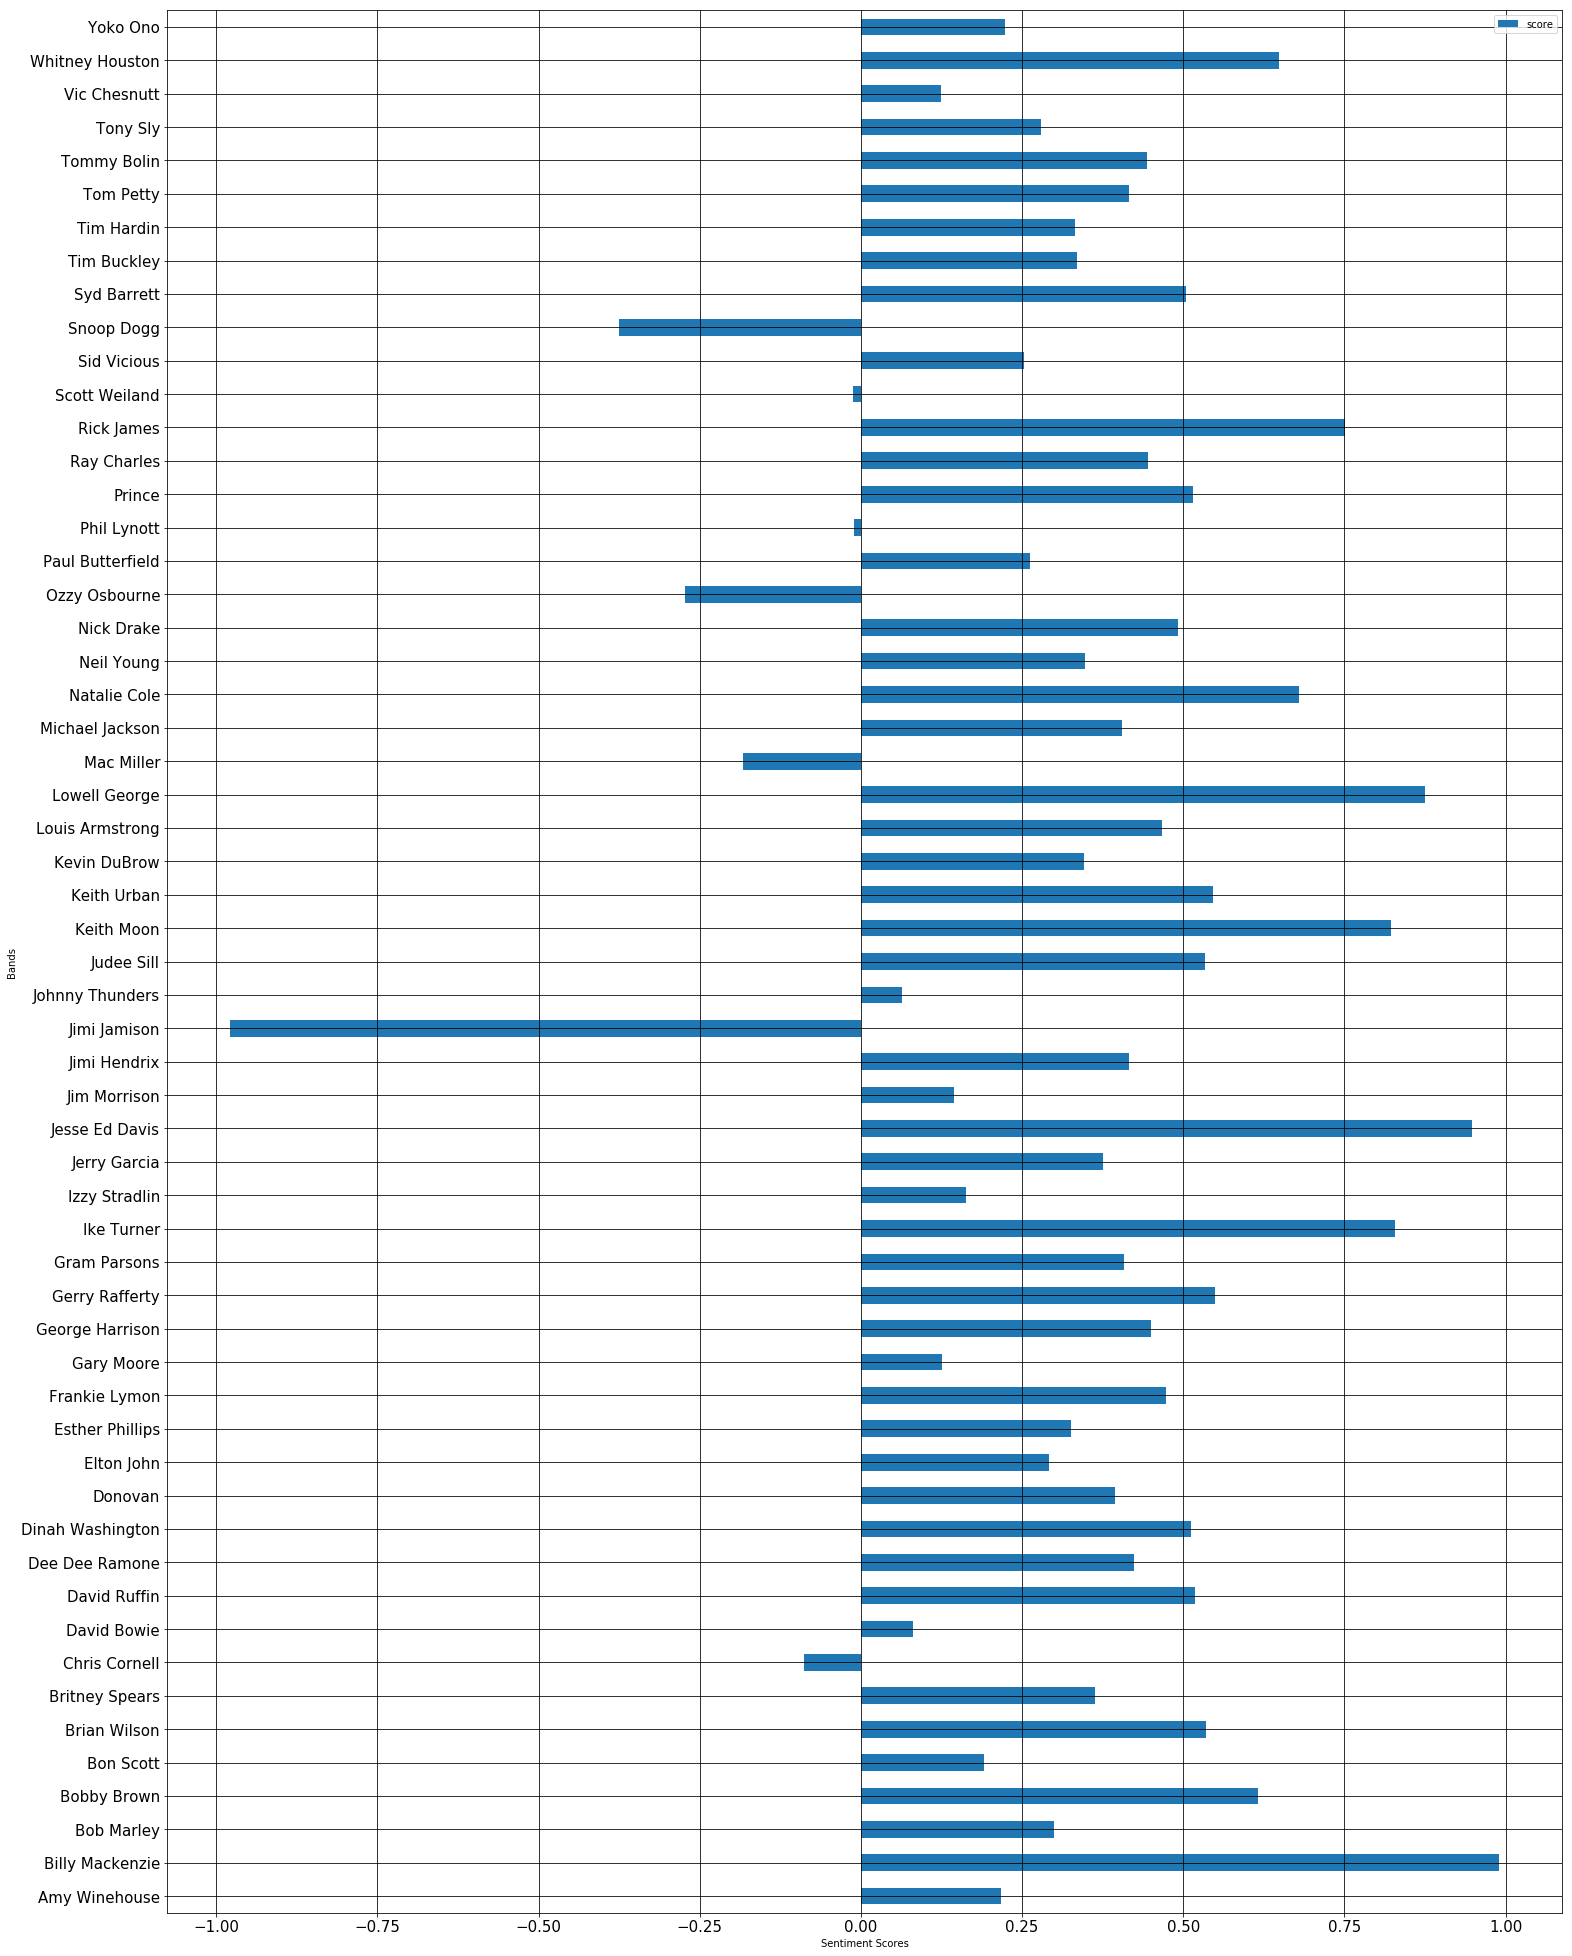

In [286]:
%matplotlib inline
sentimentScores.plot(kind="barh", figsize=(25,35), grid=True, fontsize=15)
plt.ylabel("Bands")
plt.xlabel("Sentiment Scores")

Text(0.5, 0, 'Sentiment Scores')

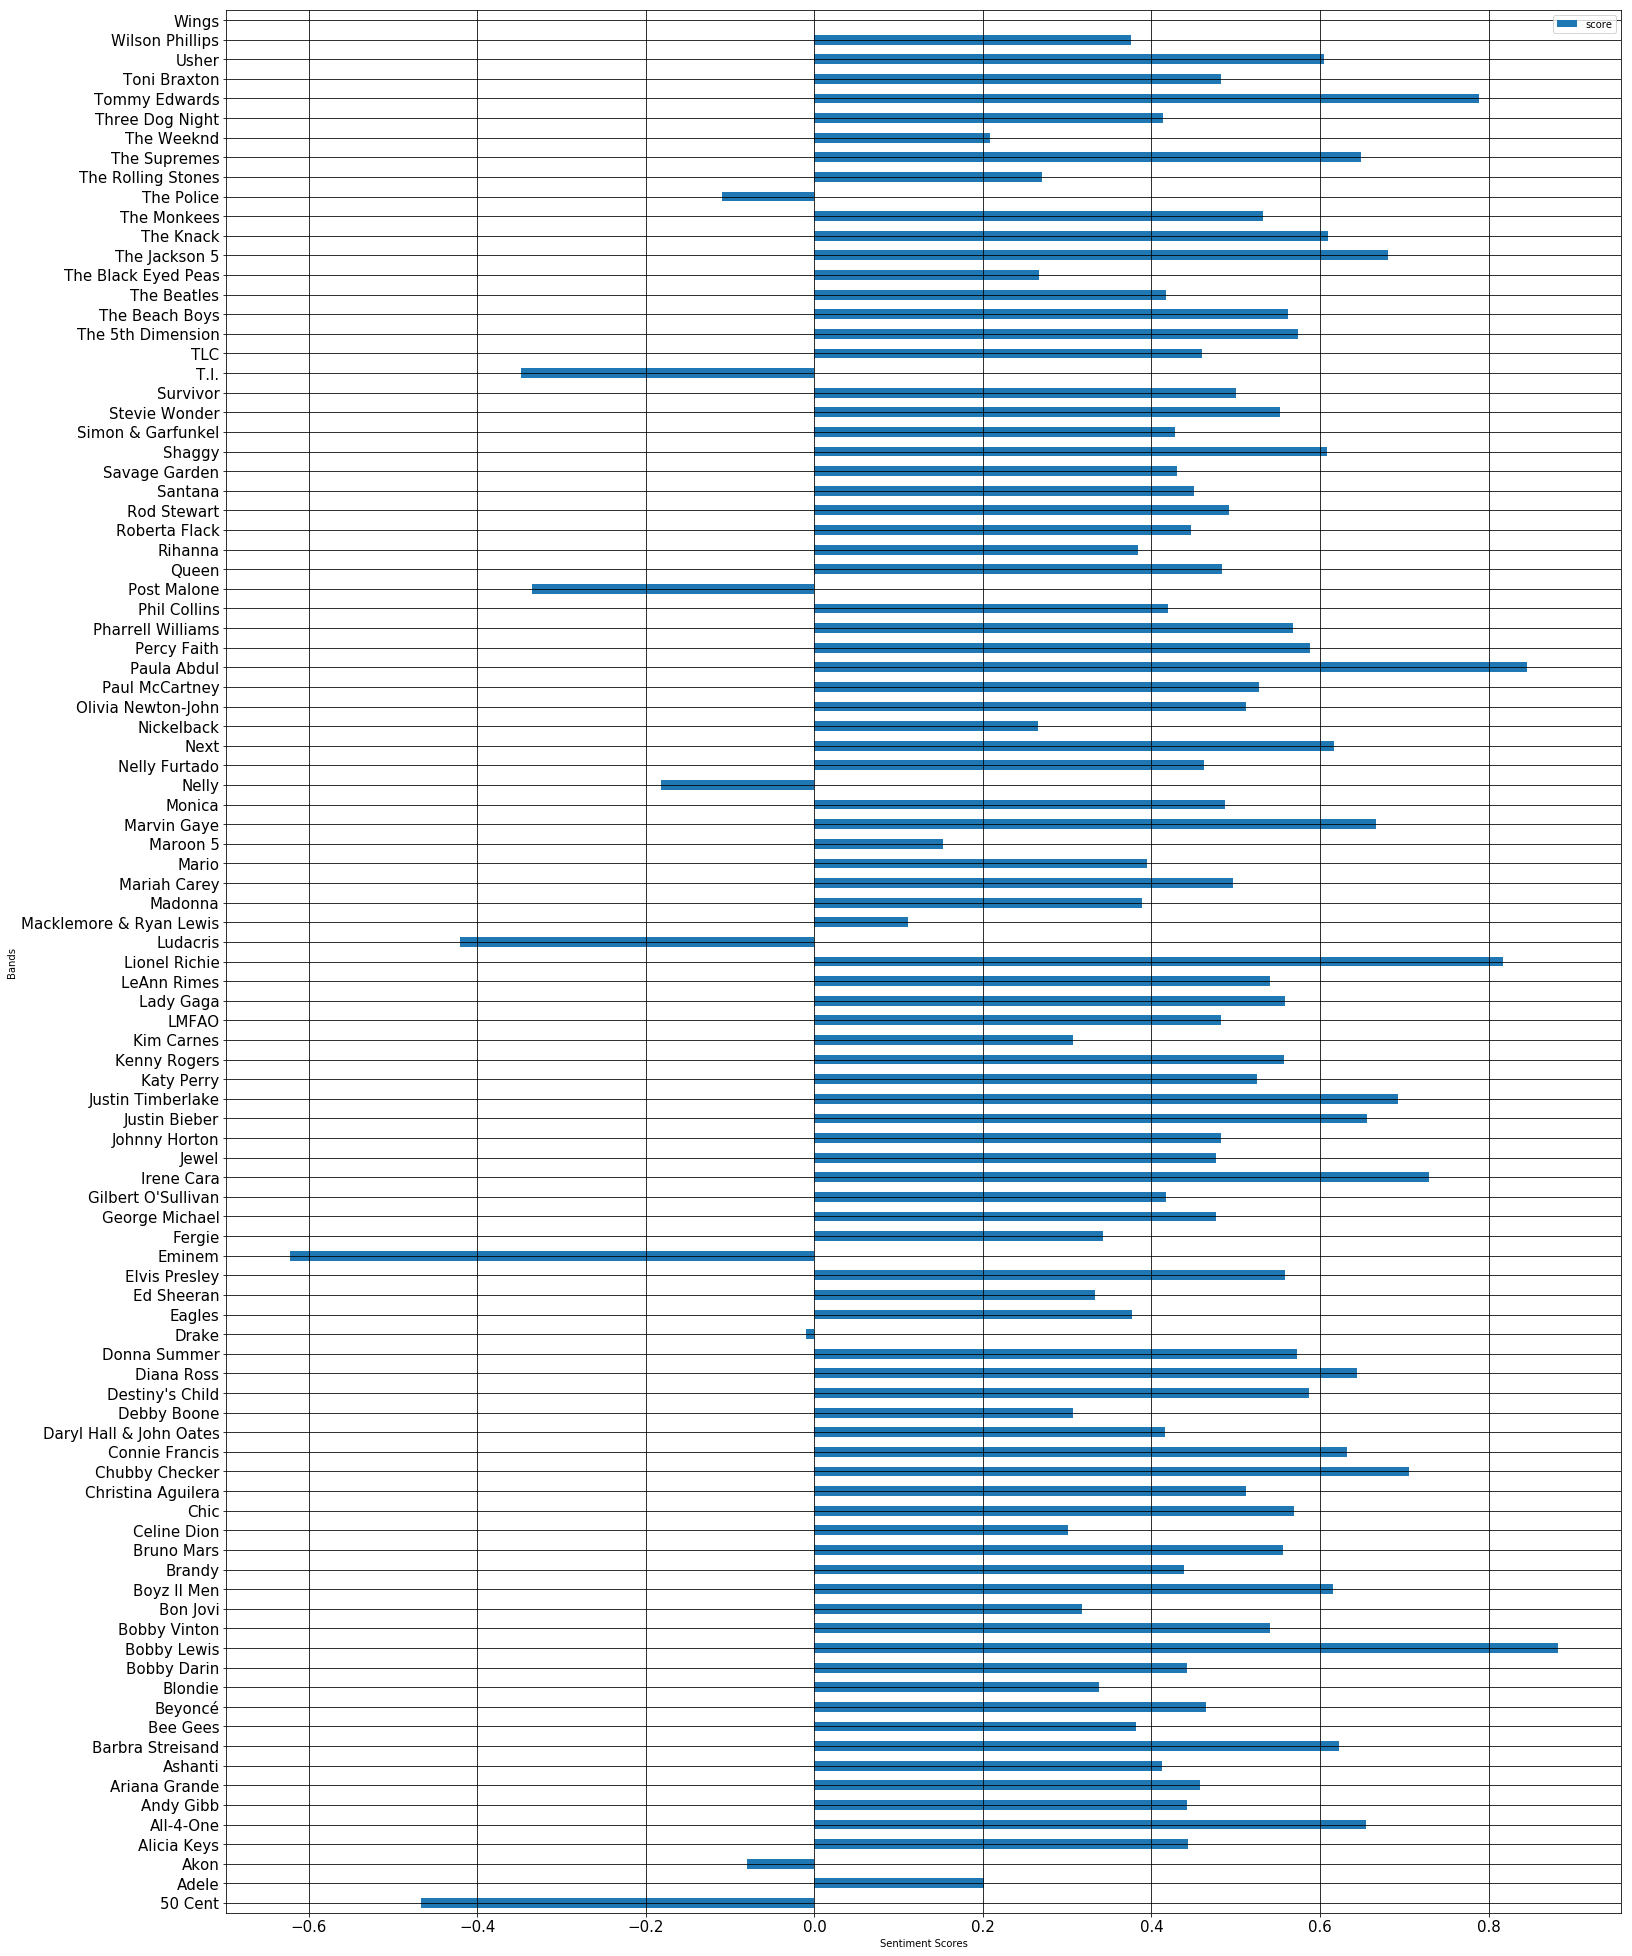

In [287]:
%matplotlib inline
sentimentScores2.plot(kind="barh", figsize=(25,35), grid=True, fontsize=15)
plt.ylabel("Bands")
plt.xlabel("Sentiment Scores")

Text(0.5, 1.0, 'Living artists with positive lyrics')

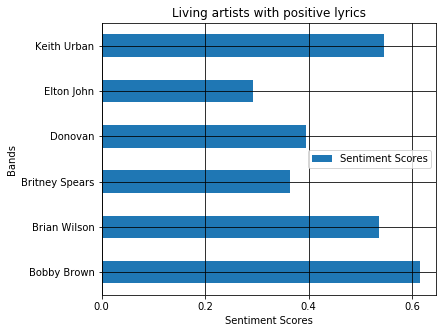

In [288]:
sS = sentimentScores
PA = pd.DataFrame(index=["Bobby Brown", 
                         "Brian Wilson", 
                         "Britney Spears", 
                         "Donovan", 
                         "Elton John", 
                         "Keith Urban"], 
                  columns=["Sentiment Scores"])
PA.iloc[0] = sS.loc['Bobby Brown', 'score']
PA.iloc[1] = sS.loc['Brian Wilson', 'score']
PA.iloc[2] = sS.loc['Britney Spears', 'score']
PA.iloc[3] = sS.loc['Donovan', 'score']
PA.iloc[4] = sS.loc['Elton John', 'score']
PA.iloc[5] = sS.loc['Keith Urban', 'score']

PA.plot(kind="barh", figsize=(6, 5), fontsize=10, grid=True)
plt.ylabel('Bands')
plt.xlabel('Sentiment Scores')

plt.title('Living artists with positive lyrics')

Text(0.5, 1.0, 'Deceased artists with positive lyrics')

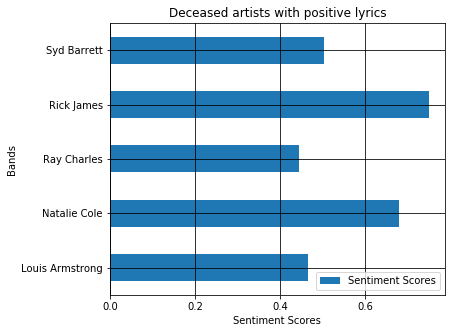

In [289]:
sS = sentimentScores
PA = pd.DataFrame(index=["Louis Armstrong", 
                         "Natalie Cole", 
                         "Ray Charles", 
                         "Rick James", 
                         "Syd Barrett"], 
                  columns=["Sentiment Scores"])
PA.iloc[0] = sS.loc['Louis Armstrong', 'score']
PA.iloc[1] = sS.loc['Natalie Cole', 'score']
PA.iloc[2] = sS.loc['Ray Charles', 'score']
PA.iloc[3] = sS.loc['Rick James', 'score']
PA.iloc[4] = sS.loc['Syd Barrett', 'score']

PA.plot(kind="barh", figsize=(6, 5), fontsize=10, grid=True)
plt.ylabel('Bands')
plt.xlabel('Sentiment Scores')

plt.title('Deceased artists with positive lyrics')

Text(0.5, 1.0, 'Artists with negative lyrics who had a history of drug abuse/died of drugs')

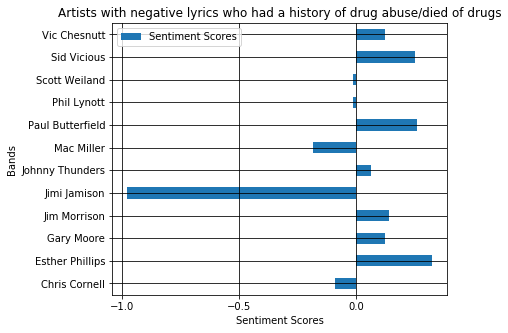

In [290]:
sS = sentimentScores
PA = pd.DataFrame(index=["Chris Cornell", 
                         "Esther Phillips", 
                         "Gary Moore", 
                         "Jim Morrison", 
                         "Jimi Jamison", 
                         "Johnny Thunders", 
                         "Mac Miller", 
                         "Paul Butterfield", 
                         "Phil Lynott", 
                         "Scott Weiland", 
                         "Sid Vicious", 
                         "Vic Chesnutt"], 
                  columns=["Sentiment Scores"])
PA.iloc[0] = sS.loc['Chris Cornell', 'score']
PA.iloc[1] = sS.loc['Esther Phillips', 'score']
PA.iloc[2] = sS.loc['Gary Moore', 'score']
PA.iloc[3] = sS.loc['Jim Morrison', 'score']
PA.iloc[4] = sS.loc['Jimi Jamison', 'score']
PA.iloc[5] = sS.loc['Johnny Thunders', 'score']
PA.iloc[6] = sS.loc['Mac Miller', 'score']
PA.iloc[7] = sS.loc['Paul Butterfield', 'score']
PA.iloc[8] = sS.loc['Phil Lynott', 'score']
PA.iloc[9] = sS.loc['Scott Weiland', 'score']
PA.iloc[10] = sS.loc['Sid Vicious', 'score']
PA.iloc[11] = sS.loc['Vic Chesnutt', 'score']

PA.plot(kind="barh", figsize=(6, 5), fontsize=10, grid=True)
plt.ylabel('Bands')
plt.xlabel('Sentiment Scores')

plt.title('Artists with negative lyrics who had a history of drug abuse/died of drugs')

Text(0.5, 1.0, 'Artists with positive lyrics who are alive/died of non-drug related causes')

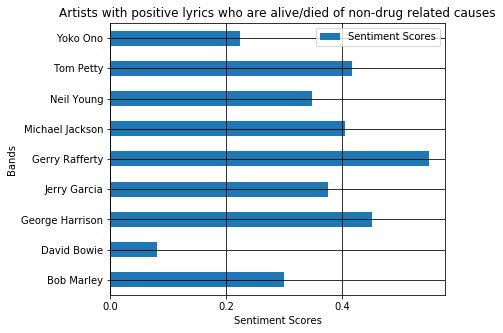

In [291]:
sS = sentimentScores
PA = pd.DataFrame(index=["Bob Marley", 
                         "David Bowie", 
                         "George Harrison", 
                         "Jerry Garcia", 
                         "Gerry Rafferty", 
                        "Michael Jackson", 
                        "Neil Young", 
                        "Tom Petty", 
                        "Yoko Ono"], 
                  columns=["Sentiment Scores"])
PA.iloc[0] = sS.loc['Bob Marley', 'score']
PA.iloc[1] = sS.loc['David Bowie', 'score']
PA.iloc[2] = sS.loc['George Harrison', 'score']
PA.iloc[3] = sS.loc['Jerry Garcia', 'score']
PA.iloc[4] = sS.loc['Gerry Rafferty', 'score']
PA.iloc[5] = sS.loc['Michael Jackson', 'score']
PA.iloc[6] = sS.loc['Neil Young', 'score']
PA.iloc[7] = sS.loc['Tom Petty', 'score']
PA.iloc[8] = sS.loc['Yoko Ono', 'score']

PA.plot(kind="barh", figsize=(6, 5), fontsize=10, grid=True)
plt.ylabel('Bands')
plt.xlabel('Sentiment Scores')

plt.title('Artists with positive lyrics who are alive/died of non-drug related causes')

Text(0.5, 1.0, 'Artists with negative lyrics who had a history of drug abuse/died of drugs')

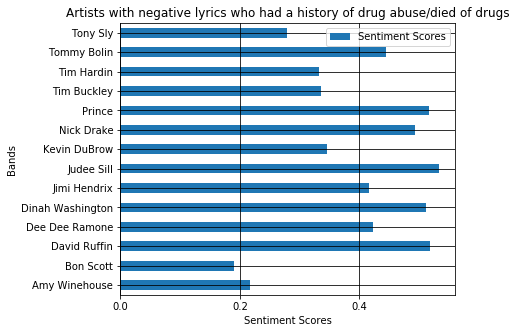

In [292]:
sS = sentimentScores
PA = pd.DataFrame(index=["Amy Winehouse", 
                         "Bon Scott", 
                         "David Ruffin", 
                         "Dee Dee Ramone", 
                         "Dinah Washington", 
                        "Jimi Hendrix", 
                        "Judee Sill", 
                        "Kevin DuBrow", 
                        "Nick Drake", 
                        "Prince", 
                        "Tim Buckley", 
                        "Tim Hardin", 
                        "Tommy Bolin", 
                        "Tony Sly"], 
                  columns=["Sentiment Scores"])
PA.iloc[0] = sS.loc['Amy Winehouse', 'score']
PA.iloc[1] = sS.loc['Bon Scott', 'score']
PA.iloc[2] = sS.loc['David Ruffin', 'score']
PA.iloc[3] = sS.loc['Dee Dee Ramone', 'score']
PA.iloc[4] = sS.loc['Dinah Washington', 'score']
PA.iloc[5] = sS.loc['Jimi Hendrix', 'score']
PA.iloc[6] = sS.loc['Judee Sill', 'score']
PA.iloc[7] = sS.loc['Kevin DuBrow', 'score']
PA.iloc[8] = sS.loc['Nick Drake', 'score']
PA.iloc[9] = sS.loc['Prince', 'score']
PA.iloc[10] = sS.loc['Tim Buckley', 'score']
PA.iloc[11] = sS.loc['Tim Hardin', 'score']
PA.iloc[12] = sS.loc['Tommy Bolin', 'score']
PA.iloc[13] = sS.loc['Tony Sly', 'score']

PA.plot(kind="barh", figsize=(6, 5), fontsize=10, grid=True)
plt.ylabel('Bands')
plt.xlabel('Sentiment Scores')

plt.title('Artists with negative lyrics who had a history of drug abuse/died of drugs')

Text(0.5, 1.0, 'Deceased outlier artists')

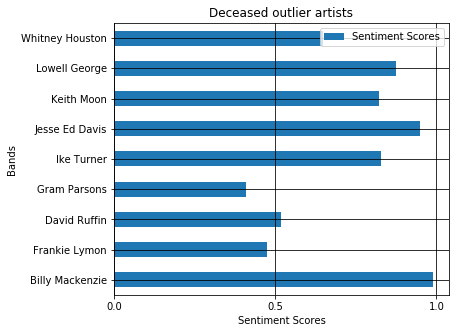

In [293]:
sS = sentimentScores
PA = pd.DataFrame(index=["Billy Mackenzie", 
                         "Frankie Lymon", 
                         "David Ruffin", 
                         "Gram Parsons", 
                         "Ike Turner", 
                        "Jesse Ed Davis", 
                        "Keith Moon", 
                        "Lowell George", 
                        "Whitney Houston"], 
                  columns=["Sentiment Scores"])
PA.iloc[0] = sS.loc['Billy Mackenzie', 'score']
PA.iloc[1] = sS.loc['Frankie Lymon', 'score']
PA.iloc[2] = sS.loc['David Ruffin', 'score']
PA.iloc[3] = sS.loc['Gram Parsons', 'score']
PA.iloc[4] = sS.loc['Ike Turner', 'score']
PA.iloc[5] = sS.loc['Jesse Ed Davis', 'score']
PA.iloc[6] = sS.loc['Keith Moon', 'score']
PA.iloc[7] = sS.loc['Lowell George', 'score']
PA.iloc[8] = sS.loc['Whitney Houston', 'score']

PA.plot(kind="barh", figsize=(6, 5), fontsize=10, grid=True)
plt.ylabel('Bands')
plt.xlabel('Sentiment Scores')

plt.title('Deceased outlier artists')

Text(0.5, 1.0, 'Living outlier artists')

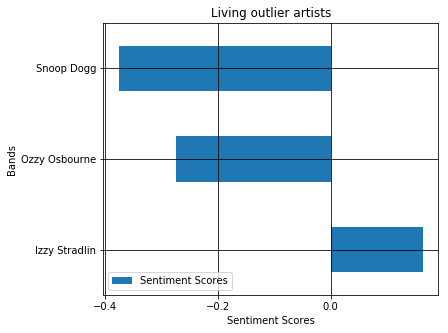

In [294]:
sS = sentimentScores
PA = pd.DataFrame(index=["Izzy Stradlin", 
                         "Ozzy Osbourne", 
                         "Snoop Dogg"], 
                  columns=["Sentiment Scores"])
PA.iloc[0] = sS.loc['Izzy Stradlin', 'score']
PA.iloc[1] = sS.loc['Ozzy Osbourne', 'score']
PA.iloc[2] = sS.loc['Snoop Dogg', 'score']

PA.plot(kind="barh", figsize=(6, 5), fontsize=10, grid=True)
plt.ylabel('Bands')
plt.xlabel('Sentiment Scores')

plt.title('Living outlier artists')

## Privacy/Ethics Considerations

Briefly acknowledge and address any potential issues of ethics and privacy for the proposed project. In particular:
Do you have permission to use this data for this purpose?
Wikipedia info: yes, under creative commons license (https://en.wikipedia.org/wiki/Wikipedia:Reusing_Wikipedia_content#Re-use_of_text_under_Creative_Commons_Attribution-ShareAlike)
Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?
Since our data aren’t primary sources, privacy concerns have already been dealt with. Publishing information on wikipedia is equivalent to giving the public permission to utilize said data.
Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
Biases: 
Celebrity musicians. Not representative of all musicians.


Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
How will you handle any issues you identify?
Our dataset mainly draws from wikipedia tables, supplemented with the “Every Song You Have Heard (almost!)” dataset from Kaggle. These datasets, unless specified, are considered free to use for the public.  Wikipedia info is permissible for use by the public under the Wikimedia Creative Commons license. This also answers any possible privacy issues that could have arisen for us. For the Kaggle dataset, lyrical content is published on the web with permission from artists. There is a csv file crediting all URLs where lyrics are taken from as well.
The most apparent bias within our dataset, would be the overrepresentation of famous/celebrity artists. Many artists whose lyrics we will choose to analyze are celebrity artists, since more people are more familiar with their work, as a general rule of thumb. They are not entirely representative of the average artist or musician. Celebrity artists’ lifestyles may add bias to our data because their increased popularity leads to intensified scrutiny under the public eye, possibly leading to altered behavior, compared to the average artist. Furthermore, our study will touch on a sensitive topic of mental health. Although the project will be looking at the matter of mental health objectively, we are still going to be examining subjects from an individual’s personal life. To avoid this, we have made sure our analysis is based solely upon the data that we have, and have focused on the relationships between lyrical content, cause of death, and words that are indicative of current mental health.


## Conclusion and Discussion
For the sake of our study, let us assume that artists who are still alive or died of non-drug related charges are likely to have strong mental health and wellness in addition to higher scores, displaying lyrics that are more positive and artists who aren’t alive or died of drug related charges are likely to have mental health and wellness issues in addition to lower scores, displaying lyrics that are more negative.
We found 23 artists that have high correlation with our hypothesis, 11 with more positive lyrics and 12 with more negative lyrics.

Strong correlation (23/57) (Average: 0.547693) (Average age: 61.82)

Positive

Alive

Bobby Brown: 0.644654     Alive(50); cocaine, credits sobriety to not wanting to go back to jail
Brian Wilson: 0.554533     Alive(76); history of LSD use
Britney Spears: 0.442178     Alive(37); alcoholism, rehab, crew banned alcohol
Donovan: 0.416699	     Alive(72); recreational cannabis use
Elton John: 0.377940     Alive(71); cocaine, was able to get sober
Keith Urban: 0.610     Alive(51); credits wife for sobriety

Among those 11 artists with positive lyrics, 6 are still alive (average age: 59.5), crediting sobriety to their long-lasting success.
Britney Spears, who has struggled with alcoholism, was finally able to get sober after multiple stints in rehab and those around her have taken measures such as banning alcohol on tours to maintain her success. Bobby Brown, who has battled cocaine addiction for years, says imprisonment was the final straw and was able to reach sobriety, citing never wanting to go back to jail as motivation. Lastly, with the help of his wife, Keith Urban was able to free himself from drug and alcohol addiction.

Died of Non-Drug Related Deaths

Louis Armstrong: 0.501     Died at 69; heavy cannabis use, heart attack
Natalie Cole: 0.684     Died at 65; heart attack
Ray Charles: 0.474     Died at 73; liver disease
Rick James: 0.7877     Died at 56; heart attack, drug use, periods of sobriety
Syd Barrett: 0.531924     Died at 60; pancreatic cancer, psychedelics

The other 5 artists with positive lyrics had an average lifespan of 64.6 years, with deaths unrelated to alcohol or drug abuse.
Drugs are prevalent in the music industry. Even though each of these 5 artists has battled their fair share of drug addiction, they have also had long periods of successful sobriety. Louis Armstrong was a heavy cannabis user who ultimately died of a heart attack at 69 (unrelated to drugs), having said cannabis is "a thousand times better than whiskey" (Andrews, E. (2016, August 04)). Like Armstrong, Natalie Cole died at 65 and Rick James at 56 of a heart attack. Syd Barrett’s life was lost to pancreatic cancer at 60.

Negative (History of drug abuse/died of drugs) (Average: 0.049994) (Average age of death 42)

Chris Cornell: 0.052960     Died at 52; suicide byhanging
Esther Phillips: 0.331003     Died at 52; liver/kidney failure, drug abuse
Gary Moore: 0.183071     Died at 51; Alcohol poisoning
Jim Morrison: 0.143940     Died at 27; Heart attack (drug related)
Jimi Jamison: -0.953100     Died at 63; Stroke (Drug related)
Johnny Thunders: 0.081455     Died at 38; Drug-related
Mac Miller: -0.09     Died at 27; overdose
Paul Butterfield: 0.306     Died at 44; overdose
Phil Lynott: 0.032     Died at 36; heart failure
Scott Weiland: 0.027227     Died at 48; overdose
Sid Vicious: 0.260917     Died at 21; overdose
Vic Chesnutt: 0.224449     Died at 45; overdose

	Among those 12 artists with lower scoring lyrics, all have died as a result of overdose, suicide, or drug-related causes.
	7 of the 12 deaths were a direct result of drug overdose or alcohol poisoning while 5 of the 12 were indirectly drug-related (liver/kidney failure, heart attack, stroke, hung himself). The average lyric score of these artists was 0.049994 and lifespan of 42 years.
	We note a significant difference in lyric score and lifespan between artists who are alive/died of non-related drug issues (lyric score 0.547693, average lifespan of 61.82 years) and artists who died of drug issues (lyric score 0.049994, average lifespan of 42 years), a lyric score difference of 0.497753 and lifespan of 20 years. Through lyric analysis, we can predict which future artists are high-risk for self-harm and raise awareness as fans to hopefully improve their quality of life and music.

Some correlation (23/57) (Average: 0.419960) (Average age: 47.52)

Among artists who we have determined have some correlation, we can create further subdivisions that would provide more insight into their lyric score. This group of artists in the middle with some correlation was determined by chronic drug use, spanning multiple decades, with no admittance of sobriety or rehab stints. It is in between our primary group and outliers.
	Similar to the group of artists who displayed strong correlation, we took our group of 23 and divided it into two. Let us assume artists who are still alive or died of non-drug related reasons are likely to have strong mental health and wellness in addition to higher scores, displaying lyrics that are more positive (of which there are 9) and artists who aren’t alive or died of drug related reasons are likely to have mental health and wellness issues in addition to lower scores, displaying lyrics that are more negative (of which there are 14).

Positive (Alive/Died of Non-Drug Related Causes) (Average: 0.3928) (Average age: 61.55)

Bob Marley: 0.341659 (skin cancer; 36)
David Bowie: 0.154884 (liver cancer; 69)
George Harrison: 0.500682 (heart attack; 58)
Jerry Garcia: 0.421189 (heart attack; 53)
Gerry Rafferty: 0.570852 (heart attack; 63)
Michael Jackson: 0.421 (heart attack; 50)
Neil Young: 0.384 (alive; 73)
Tom Petty: 0.463397 (heart attack; 66)
Yoko Ono: 0.277256 (alive; 86)

Among those 9 artists who are alive or died of non-drug related causes lyrics (average age: 59.5), the average lyric score was 0.3928 and the average age was 61.55 years.
In particular, the 2 who are still alive, Neil Young (lyric score of 0.384, age 73) and Yoko Ono (lyric score of 0.277256, age 86) have been listed as having some correlation instead of strong due to their low lyric scores despite their long lives.

Negative (History of drug abuse/died of drugs) (Average: 0.437440) (Average age: 38.5)

Amy Winehouse: 0.330705 (alcohol poisoning; 27)
Bon Scott: 0.190650 (alcohol poisoning; 33)
David Ruffin: 0.573835 (overdose; 50)
Dee Dee Ramone: 0.438300 (overdose; 50)
Dinah Washington: 0.532280 (overdose; 39)
Jimi Hendrix: 0.444076 (overdose; 27)
Judee Sill: 0.567135 (overdose; 35)
Kevin Dubrow: 0.369 (overdose; 52)
Nick Drake: 0.528 (suicide; 26)
Prince: 0.553 (overdose; 57)
Tim Buckley: 0.380397 (overdose; 28)
Tim Hardin: 0.479188 (overdose; 49)
Tommy Bolin: 0.458900 (overdose; 25)
Tony Sly: 0.278700 (overdose; 41)

	Among the 14 artists that were a direct result of drug overdose or alcohol poisoning, the average lyric score of these artists was 0.437440 and lifespan of 38.5 years.
	In this sample, we note virtually no difference in lyric score between artists who are alive/died of non-related drug issues (lyric score 0.3928, average lifespan of 61.55 years) and artists who died of drug issues (lyric score 0.437440, average lifespan of 42 years), a lyric score difference of only 0.04464. This is significantly lower than the difference between artists with high correlation (0.497753). Interestingly, the difference in average lifespan is similar. The difference amongst artists with high correlation was 20 years while the difference amongst artists with some correlation was 19.45.

Weak correlation (i.e. outliers) (11/57)

Positive, Dead (Average: 0.772647)

Billy Mackenzie: 0.991200 (overdose; 39)
Frankie Lymon: 0.504580 (overdose, 26)
Gram Parsons: 0.490447 (overdose; 26)
Ike Turner: 0.829185 (overdose, 76)
Jesse Ed Davis: 0.958500 (overdose; 43)
Keith Moon: 0.822371 (overdose; 32)
Lowell George: 0.928 (overdose, 34)
Whitney Houston: 0.656898 (overdose; 49)

Negative, Alive (Average: -0.08732)

Izzy Stradlin: 0.163120 (alive(56); history of drug abuse)
Ozzy Osborn: -0.19 (alive(70), history of drug abuse)
Snoop Dogg: -0.235080 (alive(47), history of drug abuse)

For every rule, there is an exception. In our case, we have 11. In particular, 8 of the 11 who died of an overdose had an average score of 0.772647, which indicates a large amount of positivity in their lyrics. By our measure, these artists live (or had lived) long, drug-free lives with little to no mental health issues. However, this is not the case. Sadly, all 7 artists’ lives were lost to suicide or drug overdose in their 20s to 40s (average age of 35.57 years old).
Perhaps the most interesting case of the 7 is Billy Mackenzie, who has been described as naturally outgoing and extraverted (Mack, the Life: The Psychology Of Billy Mackenzie and The Associates). It was not until the death of his mother that those around him described a noticeable change in his demeanor. During the last few months of his life, Mackenzie was diagnosed as clinically depressed and would succumb to a prescription drug overdose in his father’s shed.
Mackenzie’s case leaves room for in-depth analysis. While the means of doing so are not available to our group, it is worth analyzing Mackenzie’s lyrics of the songs he made between the time of the death of his mother and his suicide. Our prediction is that they would be low/negative. Had the death of Mackenzie’s mother not led to his suicide, Mackenzie would otherwise be another case of strong correlation. For the future, we believe analyzing lyrics down by time specific time periods (week/month/year/etc.) and cross-referencing them with events in the artist’s life would yield near 100% correlation.
	The other 3, with an average score of -0.08732, are examples of weak correlation (average age of 57 years old). Despite all 3 having a heavily documented history of drug abuse, they are alive. This raises another limitation in our study. Because we are sorting artists by quantitative data, there is qualitative data we do not have access to that would help us draw conclusions. Even though these artists who are alive have scores that are a lot lower than other artists who died to suicide or overdose, the quality of their life is difficult to express in our research. They could be functioning members of society or (more likely than not) struggle to maintain their mental health on a day-to-day basis.

In discussion, according to our data research, we discovered that the majority of the artists who showed position emotions in their songs have a dark history of drug use and drug overdose that often lead them to their death. Even when their songs are happy and positive, it shows that there is no relationship between their drug use and their song lyrics. Meaning artists can do drugs and not affecting their singing career and categories. However, this could also mean that drugs also take place and make artists being happy. 
 

